MC Donald's case study

Principal Component Analysis (PCA) 

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
Explained Variance: [0.2989245  0.19299033 0.13319749 0.08317635 0.05954103 0.05032347
 0.04389724 0.03955047 0.03679625 0.03232357 0.02927931]
Cumulative Explained Variance: [0.2989245  0.49191482 0.62511231 0.70828866 0.76782969 0.81815316
 0.8620504  0.90160088 0.93839712 0.97072069 1.        ]
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.477670    0.363027 -0.304424   0.054771 -0.307186  0.171104 -0.280955   
1  -0.155997    0.016009 -0.062496  -0.142832  0.278012 -0.351254 -0.058289   
2  -0.006201    0.018852 -0.037022   0.197899  0.069905 -0.354907  0.708636   
3   0.116388   -0.033887 -0.322370  -0.354111 -0.073507 -0.408715 -0.384265   
4   0.304461   -0.063433 -0.802383   0.254231  0.361405  0.209658  0.035602   
5  

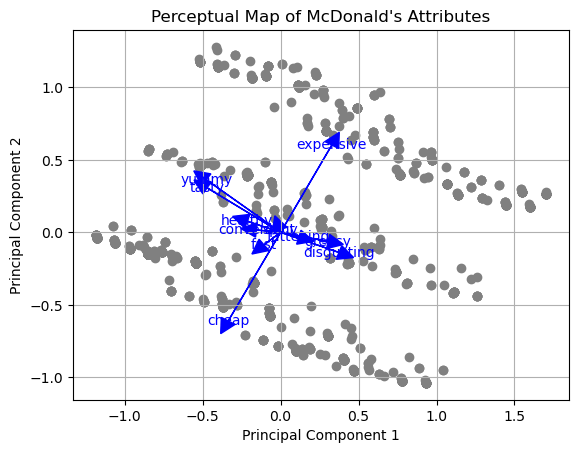

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data (replace 'your_data.csv' with the actual file path)
mcdonalds = pd.read_csv(r"E:\mcdonalds (1).csv")

# Remove the last row, as it contains demographic information which is not used in this analysis
mcdonalds = mcdonalds.iloc[:-1]

# Convert YES/NO to numeric binary (0/1)
segmentation_vars = mcdonalds.iloc[:, :11].replace({'Yes': 1, 'No': 0})

# Calculate average values of transformed binary numeric segmentation variables
avg_values = segmentation_vars.mean()
print(round(avg_values, 2))

# Perform Principal Components Analysis (PCA)
pca = PCA()
MD_pca = pca.fit_transform(segmentation_vars)

# Interpret the results of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained Variance:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

# Print factor loadings
print(pd.DataFrame(pca.components_.T, columns=segmentation_vars.columns))

# Plot the perceptual map
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Add arrows for the original segmentation variables
arrows = pca.components_.T * 0.5  # Scaling the arrows for better visualization
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(x, y, segmentation_vars.columns[i], color='blue', ha='center', va='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map of McDonald's Attributes")
plt.grid()
plt.show()


Segmentation analysis on McDonald's attributes using k-means clustering

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


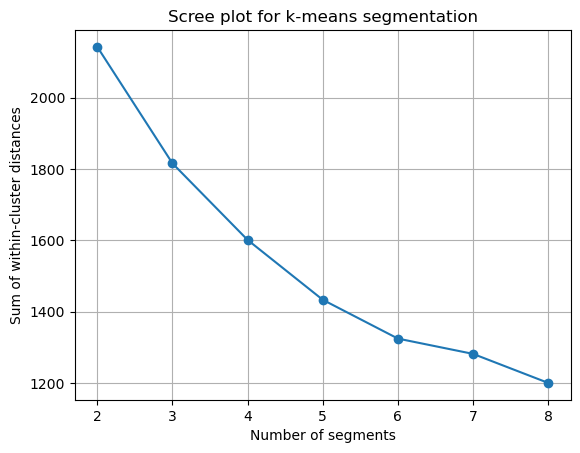

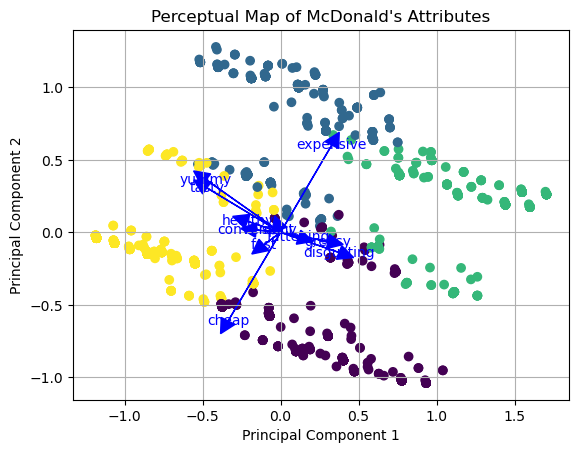

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the data (assuming it's already loaded into a DataFrame called 'mcdonalds')
# Remove the last row, as it contains demographic information which is not used in this analysis
mcdonalds = mcdonalds.iloc[:-1]

# Convert YES/NO to numeric binary (0/1)
segmentation_vars = mcdonalds.iloc[:, :11].replace({'Yes': 1, 'No': 0})

# Calculate average values of transformed binary numeric segmentation variables
avg_values = segmentation_vars.mean()
print(round(avg_values, 2))

# Perform k-means analysis with 10 random restarts for 2 to 8 segments
np.random.seed(1234)
k_values = range(2, 9)
segmentations = []
sum_within_cluster_distances = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(segmentation_vars)
    segmentations.append(kmeans)
    sum_within_cluster_distances.append(kmeans.inertia_)

# Plot the scree plot to compare different solutions
plt.plot(k_values, sum_within_cluster_distances, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree plot for k-means segmentation")
plt.grid()
plt.show()

# Choose the best number of segments based on the scree plot (e.g., four-segment solution)
best_k = 4
best_segmentation = segmentations[best_k - 2]

# Perform Principal Components Analysis (PCA) for the perceptual map
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(segmentation_vars)

# Plot the perceptual map
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=best_segmentation.labels_)
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(x, y, segmentation_vars.columns[i], color='blue', ha='center', va='center')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map of McDonald's Attributes")
plt.grid()
plt.show()

# Perform stability-based data structure analysis (not directly available in Python)
# You can consider using other libraries or custom implementations to achieve this.


In [3]:
pip install mixem


Clustering analysis using both k-means and Gaussian Mixture Model (GMM) on the McDonald's attributes data.

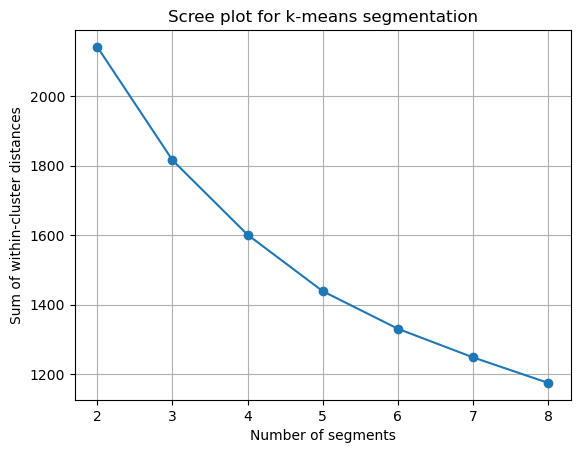

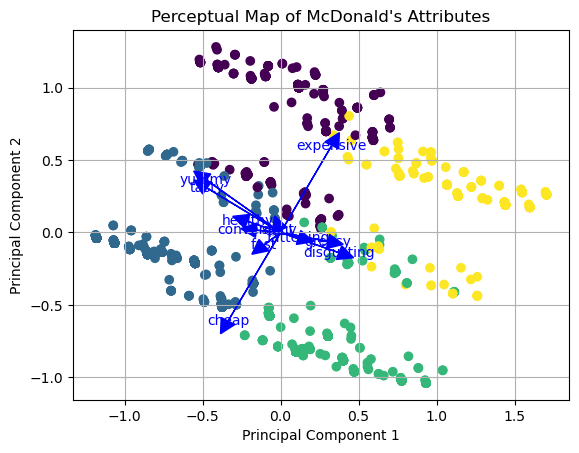

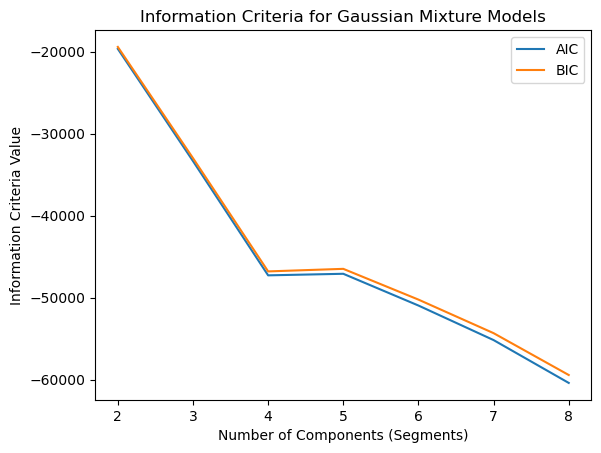

GMM        0    1    2    3
k-means                    
0          0    0  122  192
1          0  467   83   29
2        230   28   16   54
3        179    0   15   35


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Load the data (assuming it's already loaded into a DataFrame called 'mcdonalds')
# Remove the last row, as it contains demographic information which is not used in this analysis
mcdonalds = mcdonalds.iloc[:-1]

# Convert YES/NO to numeric binary (0/1)
segmentation_vars = mcdonalds.iloc[:, :11].replace({'Yes': 1, 'No': 0})

# Perform k-means analysis with 10 random restarts for 2 to 8 segments
np.random.seed(1234)
k_values = range(2, 9)
segmentations = []
sum_within_cluster_distances = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(segmentation_vars)
    segmentations.append(kmeans)
    sum_within_cluster_distances.append(kmeans.inertia_)

# Plot the scree plot to compare different solutions
plt.plot(k_values, sum_within_cluster_distances, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree plot for k-means segmentation")
plt.grid()
plt.show()

# Choose the best number of segments based on the scree plot (e.g., four-segment solution)
best_k = 4
best_segmentation = segmentations[best_k - 2]

# Perform Principal Components Analysis (PCA) for the perceptual map
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(segmentation_vars)

# Plot the perceptual map
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=best_segmentation.labels_)
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(x, y, segmentation_vars.columns[i], color='blue', ha='center', va='center')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map of McDonald's Attributes")
plt.grid()
plt.show()

# Fit Gaussian Mixture Model for two to eight components (segments) using 10 random restarts
components_range = range(2, 9)
n_restarts = 10
gmm_results = []

for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=n_restarts, covariance_type='diag', random_state=1234)
    gmm.fit(segmentation_vars)
    gmm_results.append(gmm)

# Plot the information criteria (AIC, BIC) to choose the suitable number of segments
aic_values = [gmm.aic(segmentation_vars) for gmm in gmm_results]
bic_values = [gmm.bic(segmentation_vars) for gmm in gmm_results]

plt.plot(components_range, aic_values, label='AIC')
plt.plot(components_range, bic_values, label='BIC')
plt.xlabel("Number of Components (Segments)")
plt.ylabel("Information Criteria Value")
plt.legend()
plt.title("Information Criteria for Gaussian Mixture Models")
plt.show()

# Choose the number of segments based on the plot (e.g., 4 segments)
n_segments = 4

# Get the cluster assignments for each data point from the mixture model
cluster_assignments = gmm_results[n_segments - 2].predict(segmentation_vars)

# Assuming 'MD_k4' is the DataFrame containing the k-means results
# Replace 'MD_k4' with the correct DataFrame name for the k-means results
kmeans_clusters = best_segmentation.labels_

# Compare GMM clusters to k-means clusters using a cross-tabulation
cross_tab = pd.crosstab(kmeans_clusters, cluster_assignments, rownames=['k-means'], colnames=['GMM'])
print(cross_tab)


In [5]:
mcdonalds.dropna(inplace=True)


In [6]:
print(mcdonalds.shape)


(1450, 15)


In [7]:
print(mcdonalds.dtypes)


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [8]:
print(mcdonalds.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [9]:
print(mcdonalds.dtypes)


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [10]:
print(mcdonalds.isnull().sum())


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [11]:
# Data loading
mcdonalds = pd.read_csv(r"E:\mcdonalds (1).csv")

# Check the DataFrame after loading
print(mcdonalds.head())  # Check the first few rows

# Remove the last row
mcdonalds = mcdonalds.iloc[:-1]

# Check the DataFrame after removing the last row
print(mcdonalds.head())  # Check the first few rows

# Mapping ordinal values to numeric values
# (Make sure the 'Like' column is in the DataFrame)
ordinal_mapping = {
    # Define the mapping here
}
mcdonalds['Like.n'] = mcdonalds['Like'].map(ordinal_mapping)

# Check the DataFrame after mapping ordinal values
print(mcdonalds.head())  # Check the first few rows

# Handle missing values using imputation
# (Assuming the imputation step is not causing the issue)
# You can add print statements to check the DataFrame after imputation.

# Continue with the rest of the code for Gaussian Mixture Model and Logistic Regression.


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes

In [13]:
for col in mcdonalds.columns:
    unique_values = mcdonalds[col].unique()
    print(f"Column '{col}': {unique_values}")


Column 'yummy': ['No' 'Yes']
Column 'convenient': ['Yes' 'No']
Column 'spicy': ['No' 'Yes']
Column 'fattening': ['Yes' 'No']
Column 'greasy': ['No' 'Yes']
Column 'fast': ['Yes' 'No']
Column 'cheap': ['Yes' 'No']
Column 'tasty': ['No' 'Yes']
Column 'expensive': ['Yes' 'No']
Column 'healthy': ['No' 'Yes']
Column 'disgusting': ['No' 'Yes']
Column 'Like': ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Column 'Age': [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
Column 'VisitFrequency': ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Column 'Gender': ['Female' 'Male']
Column 'Like.n': [-3.  2.  1.  4. nan -2.  3.  0. -1.]


In [14]:
mcdonalds.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [15]:
# Check the data types of each column
print(mcdonalds.dtypes)

# Identify non-numeric columns
non_numeric_columns = mcdonalds.select_dtypes(exclude=[int, float]).columns
print("Non-numeric columns:", non_numeric_columns)

# Check unique values in non-numeric columns
for col in non_numeric_columns:
    unique_values = mcdonalds[col].unique()
    print(f"Column '{col}': {unique_values}")


yummy              object
convenient         object
spicy              object
fattening          object
greasy             object
fast               object
cheap              object
tasty              object
expensive          object
healthy            object
disgusting         object
Like               object
Age                 int64
VisitFrequency     object
Gender             object
Like.n            float64
dtype: object
Non-numeric columns: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency',
       'Gender'],
      dtype='object')
Column 'yummy': ['No' 'Yes']
Column 'convenient': ['Yes' 'No']
Column 'spicy': ['No' 'Yes']
Column 'fattening': ['Yes' 'No']
Column 'greasy': ['No' 'Yes']
Column 'fast': ['Yes' 'No']
Column 'cheap': ['Yes' 'No']
Column 'tasty': ['No' 'Yes']
Column 'expensive': ['Yes' 'No']
Column 'healthy': ['No' 'Yes']
Column 'disgusting': ['No' 'Yes']
Column 'Lik

In [16]:
# Check the data types of each column
print(mcdonalds.dtypes)

# Identify non-numeric columns
non_numeric_columns = mcdonalds.select_dtypes(exclude=[int, float]).columns
print("Non-numeric columns:", non_numeric_columns)

# Check unique values in non-numeric columns
for col in non_numeric_columns:
    unique_values = mcdonalds[col].unique()
    print(f"Column '{col}': {unique_values}")


yummy              object
convenient         object
spicy              object
fattening          object
greasy             object
fast               object
cheap              object
tasty              object
expensive          object
healthy            object
disgusting         object
Like               object
Age                 int64
VisitFrequency     object
Gender             object
Like.n            float64
dtype: object
Non-numeric columns: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency',
       'Gender'],
      dtype='object')
Column 'yummy': ['No' 'Yes']
Column 'convenient': ['Yes' 'No']
Column 'spicy': ['No' 'Yes']
Column 'fattening': ['Yes' 'No']
Column 'greasy': ['No' 'Yes']
Column 'fast': ['Yes' 'No']
Column 'cheap': ['Yes' 'No']
Column 'tasty': ['No' 'Yes']
Column 'expensive': ['Yes' 'No']
Column 'healthy': ['No' 'Yes']
Column 'disgusting': ['No' 'Yes']
Column 'Lik

In [17]:
# Perform one-hot encoding for categorical columns
mcdonalds = pd.get_dummies(mcdonalds, columns=non_numeric_columns, drop_first=True)

# Now, check the data types after one-hot encoding
print(mcdonalds.dtypes)

# Rest of the code remains the same...


Age                                       int64
Like.n                                  float64
yummy_Yes                                 uint8
convenient_Yes                            uint8
spicy_Yes                                 uint8
fattening_Yes                             uint8
greasy_Yes                                uint8
fast_Yes                                  uint8
cheap_Yes                                 uint8
tasty_Yes                                 uint8
expensive_Yes                             uint8
healthy_Yes                               uint8
disgusting_Yes                            uint8
Like_+2                                   uint8
Like_+3                                   uint8
Like_+4                                   uint8
Like_-1                                   uint8
Like_-2                                   uint8
Like_-3                                   uint8
Like_-4                                   uint8
Like_0                                  

hierarchical clustering analysis

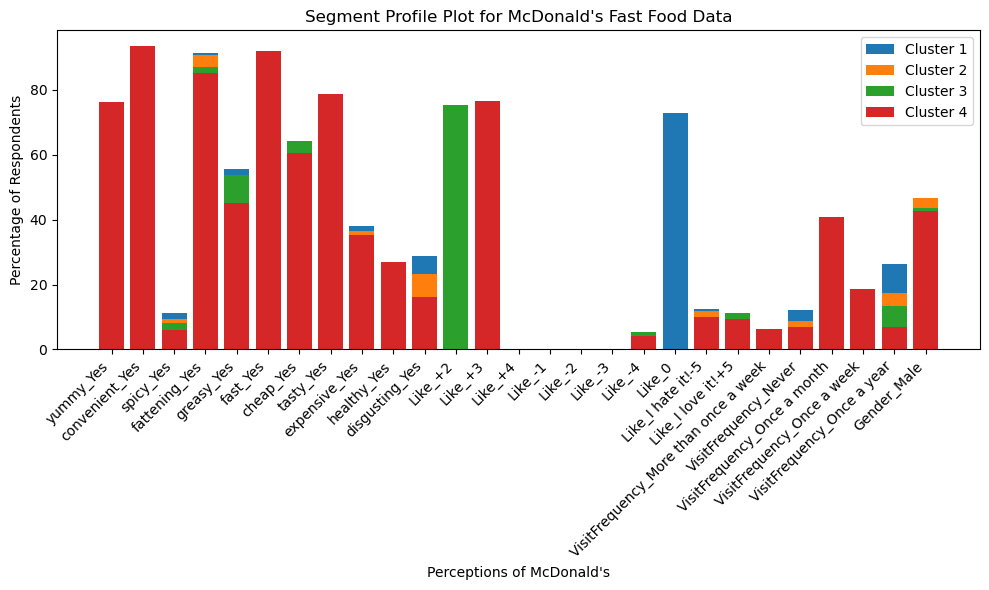

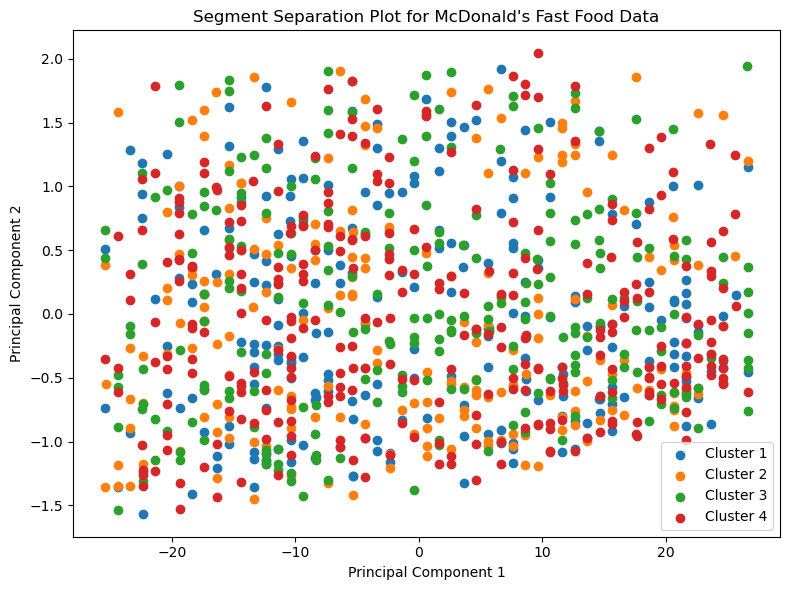

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'mcdonalds' DataFrame contains the data with columns as described earlier

# Convert 'Like.n' column to numeric values
mcdonalds['Like.n'] = pd.to_numeric(mcdonalds['Like.n'], errors='coerce')

# Drop rows with missing 'Like.n' values
mcdonalds.dropna(subset=['Like.n'], inplace=True)

# Convert 'Like.n' column to integers
mcdonalds['Like.n'] = mcdonalds['Like.n'].astype(int)

# Step 1: Use PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(mcdonalds.drop(columns=['Like.n']))

# Step 2: Perform hierarchical clustering on the PCA-transformed data
distance_matrix = linkage(X_pca, method='ward')

# Step 3: Reorder the rows of the DataFrame based on the hierarchical clustering
ordered_rows = mcdonalds.iloc[dendrogram(distance_matrix, no_plot=True, orientation='right')['leaves']]
mcdonalds_reordered = mcdonalds.loc[ordered_rows.index]

# Step 4: Plot the segment profile plot
fig, ax = plt.subplots(figsize=(10, 6))
num_segments = 4  # Assuming 4 segments
segment_names = [f"Cluster {i + 1}" for i in range(num_segments)]

for i, segment_name in enumerate(segment_names):
    segment_data = mcdonalds_reordered[mcdonalds_reordered['Like.n'] == i]
    segment_percentage = segment_data.iloc[:, 2:].mean() * 100
    ax.bar(range(len(segment_percentage)), segment_percentage, label=segment_name)

ax.set_xticks(range(len(segment_percentage)))
ax.set_xticklabels(segment_percentage.index, rotation=45, ha='right')
ax.set_xlabel('Perceptions of McDonald\'s')
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Segment Profile Plot for McDonald\'s Fast Food Data')
ax.legend()
plt.tight_layout()
plt.show()

# Step 5: Plot the segment separation plot
plt.figure(figsize=(8, 6))
for i, segment_name in enumerate(segment_names):
    segment_data = X_pca[mcdonalds_reordered['Like.n'] == i]
    plt.scatter(segment_data[:, 0], segment_data[:, 1], label=segment_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot for McDonald\'s Fast Food Data')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Step 1: Use PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(mcdonalds.drop(columns=['Like.n']))

# Check the shapes of X_pca and mcdonalds DataFrame
print("Shape of X_pca:", X_pca.shape)
print("Shape of mcdonalds DataFrame:", mcdonalds.shape)

# Step 2: Perform hierarchical clustering on the PCA-transformed data
distance_matrix = linkage(X_pca, method='ward')

# Rest of the code remains the same


Shape of X_pca: (1451, 2)
Shape of mcdonalds DataFrame: (1451, 29)


In [25]:
# Check the first few rows of the mcdonalds DataFrame
print(mcdonalds.head())

# Check the shape of the distance_matrix and X_pca
print("Shape of distance_matrix:", distance_matrix.shape)
print("Shape of X_pca:", X_pca.shape)

# Check the number of unique values in the 'Like.n' column
print("Unique values in 'Like.n' column:", mcdonalds['Like.n'].unique())


   Age  Like.n  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  \
0   61      -3          0               1          0              1   
1   51       2          1               1          0              1   
2   62       1          0               1          1              1   
3   69       4          1               1          0              1   
4   49       2          0               1          0              1   

   greasy_Yes  fast_Yes  cheap_Yes  tasty_Yes  ...  Like_-4  Like_0  \
0           0         1          1          0  ...        0       0   
1           1         1          1          1  ...        0       0   
2           1         1          0          1  ...        0       0   
3           1         1          1          1  ...        0       0   
4           1         1          1          0  ...        0       0   

   Like_I hate it!-5  Like_I love it!+5  VisitFrequency_More than once a week  \
0                  0                  0                          

In [26]:
print("Shape of X_pca:", X_pca.shape)
print("Shape of mcdonalds DataFrame:", mcdonalds.shape)


Shape of X_pca: (1451, 2)
Shape of mcdonalds DataFrame: (1451, 29)


In [27]:
print("First few rows of X_pca:")
print(X_pca[:5])  # Print first 5 rows of X_pca

print("First few rows of mcdonalds DataFrame:")
print(mcdonalds.head())  # Print first few rows of mcdonalds DataFrame


First few rows of X_pca:
[[-16.39408007   0.31107967]
 [ -6.36910696  -0.30588607]
 [-17.38091187   0.1528496 ]
 [-24.36441005  -0.47929543]
 [ -4.38477618   0.03453479]]
First few rows of mcdonalds DataFrame:
   Age  Like.n  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  \
0   61      -3          0               1          0              1   
1   51       2          1               1          0              1   
2   62       1          0               1          1              1   
3   69       4          1               1          0              1   
4   49       2          0               1          0              1   

   greasy_Yes  fast_Yes  cheap_Yes  tasty_Yes  ...  Like_-4  Like_0  \
0           0         1          1          0  ...        0       0   
1           1         1          1          1  ...        0       0   
2           1         1          0          1  ...        0       0   
3           1         1          1          1  ...        0       0   
4       

In [28]:
duplicate_rows = mcdonalds[mcdonalds.duplicated()]
print("Duplicate rows in mcdonalds DataFrame:")
print(duplicate_rows)


Duplicate rows in mcdonalds DataFrame:
      Age  Like.n  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  \
421    25       3          1               1          0              1   
441    62       2          0               1          0              1   
453    43       2          1               1          0              1   
710    49       4          1               1          0              1   
725    42       0          0               1          0              1   
741    21       2          1               1          0              1   
745    20       2          1               1          0              1   
774    38       4          1               1          0              1   
799    55       2          1               1          0              1   
971    33       2          1               1          0              1   
1001   38       4          1               1          0              1   
1070   51       3          1               1          0              1   

In [29]:
mcdonalds.drop_duplicates(inplace=True)


In [30]:
print("Shape of X_pca:", X_pca.shape)
print("Shape of mcdonalds DataFrame:", mcdonalds.shape)


Shape of X_pca: (1451, 2)
Shape of mcdonalds DataFrame: (1435, 29)


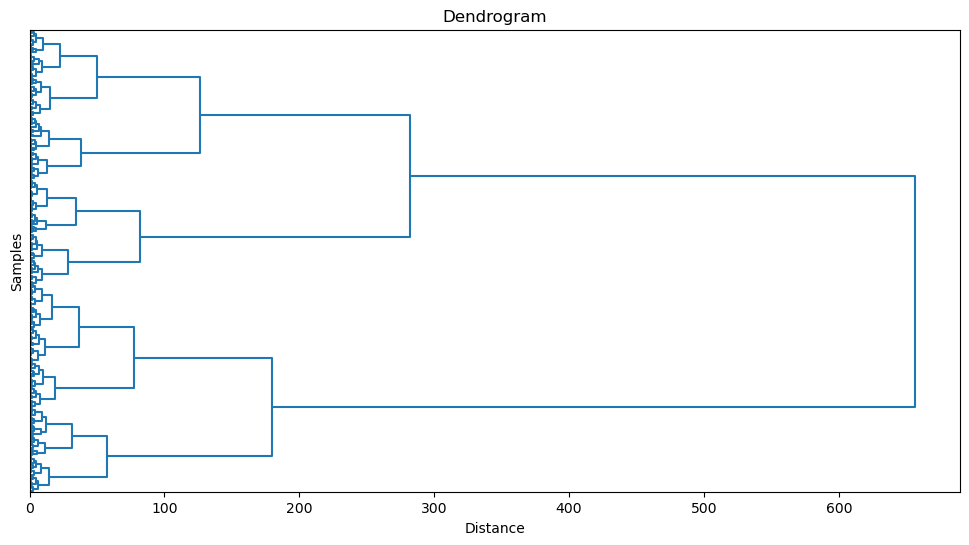

In [31]:
# Visualize the dendrogram to inspect the clustering structure
plt.figure(figsize=(12, 6))
dendrogram(distance_matrix, no_labels=True, orientation='right', leaf_font_size=10, color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Samples')
plt.show()


In [32]:
pip install matplotlib_venn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\Download folder\\anaconda1\\Lib\\site-packages\\matplotlib\\ft2font.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)


Mosaic plot to visualize the relationship between segment membership and the respondents' preferences for McDonald's attributes

<Figure size 800x600 with 0 Axes>

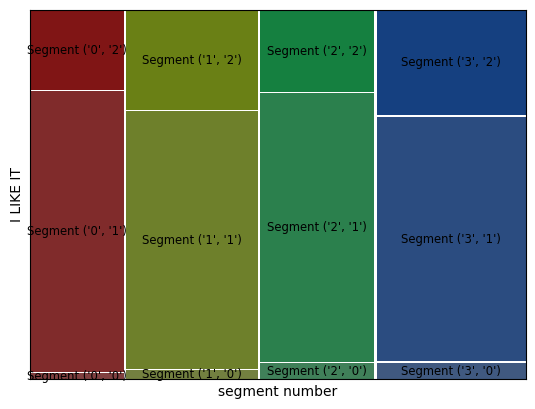

In [36]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Assume 'distance_matrix' and 'mcdonalds' DataFrame are already defined.

# Step 1: Perform hierarchical clustering to obtain segment membership
clusters = fcluster(distance_matrix, t=4, criterion='maxclust')

# Step 2: Cross-tabulate segment membership and the 'Like.n' variable
table_like_n = pd.crosstab(pd.Series(clusters, name='Segment'), mcdonalds['Like.n'])

# Step 3: Create the mosaic plot
segment_like_hate = [(segment, table_like_n.loc[segment, 1], table_like_n.loc[segment, -1]) for segment in table_like_n.index]

plt.figure(figsize=(8, 6))
mosaic(segment_like_hate, title='', labelizer=lambda k: f"Segment {k}", axes_label=False)
plt.xlabel('segment number')
plt.ylabel('I LIKE IT')
plt.show()


In [39]:
print(mcdonalds.columns)


Index(['Age', 'Like.n', 'yummy_Yes', 'convenient_Yes', 'spicy_Yes',
       'fattening_Yes', 'greasy_Yes', 'fast_Yes', 'cheap_Yes', 'tasty_Yes',
       'expensive_Yes', 'healthy_Yes', 'disgusting_Yes', 'Like_+2', 'Like_+3',
       'Like_+4', 'Like_-1', 'Like_-2', 'Like_-3', 'Like_-4', 'Like_0',
       'Like_I hate it!-5', 'Like_I love it!+5',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year', 'Gender_Male'],
      dtype='object')


Segment evaluation plot

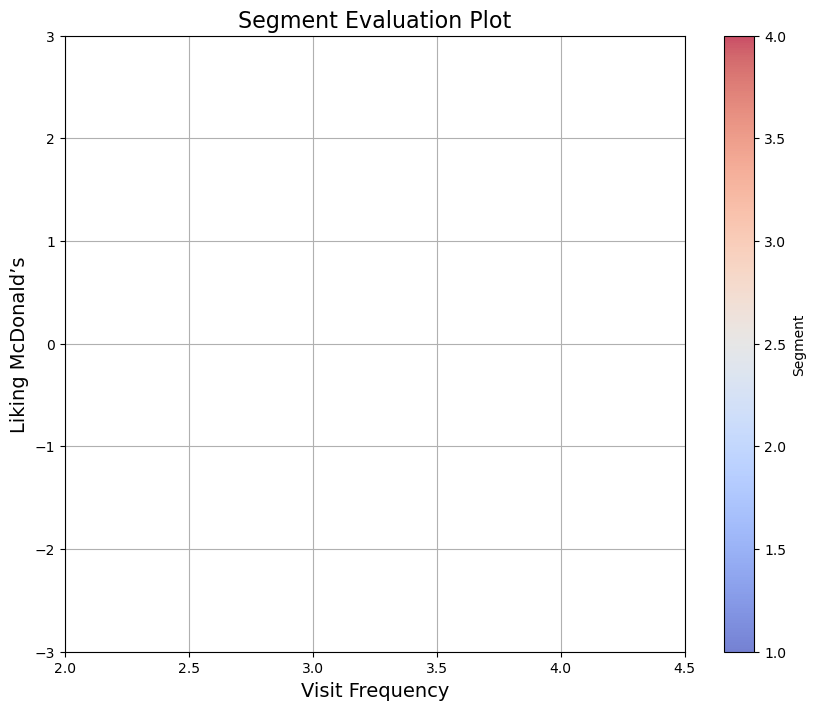

In [42]:
# Step 2: Calculate mean values for visit frequency, 'Like.n', and percentage of female consumers for each segment
segment_data = pd.DataFrame({'Segment': clusters, 
                             'VisitFrequency': mcdonalds.loc[clusters - 1, 'VisitFrequency_More than once a week'],
                             'Like.n': mcdonalds.loc[clusters - 1, 'Like.n'], 
                             'Gender': mcdonalds.loc[clusters - 1, 'Gender_Male']})

segment_means = segment_data.groupby('Segment').agg({'VisitFrequency': 'mean', 
                                                     'Like.n': 'mean',
                                                     'Gender': lambda x: np.mean(x == 1)}).reset_index()

# Step 3: Create the segment evaluation plot
plt.figure(figsize=(10, 8))
plt.scatter(segment_means['VisitFrequency'], segment_means['Like.n'], 
            s=100*segment_means['Gender'], c=segment_means['Segment'], cmap='coolwarm', alpha=0.7)

for i, txt in enumerate(segment_means['Segment']):
    plt.annotate(txt, (segment_means['VisitFrequency'].iloc[i]+0.03, segment_means['Like.n'].iloc[i]-0.15), fontsize=12)

plt.xlabel('Visit Frequency', fontsize=14)
plt.ylabel('Liking McDonald’s', fontsize=14)
plt.title('Segment Evaluation Plot', fontsize=16)
plt.colorbar(label='Segment')
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()

